# ML Exercise 1-3
## Question 3
By Gholamreza Dar

https://gholamrezadar.ir/

Nov 2021


Questions available at : [Github Link](https://github.com/Gholamrezadar/machine-learning-exercises/blob/main/ML-HW01.pdf)


## Loading data

In [ ]:
!wget https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/dataset3/train.csv
!wget https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/dataset3/test.csv

--2021-11-26 04:49:06--  https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/dataset3/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41536 (41K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  40.56K  --.-KB/s    in 0.002s  

2021-11-26 04:49:06 (21.0 MB/s) - ‘train.csv.1’ saved [41536/41536]

--2021-11-26 04:49:06--  https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/dataset3/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

sns.set()

# Load the data using pandas
raw_train_df = pd.read_csv("train.csv")
raw_test_df = pd.read_csv("test.csv")

In [ ]:
raw_train_df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
raw_test_df.head()

,age,gender,bmi,children,smoker,region,charges
0,30,male,22.99,2,yes,northwest,17361.76610
1,24,male,32.70,0,yes,southwest,34472.84100
2,24,male,25.80,0,no,southwest,1972.95000
3,48,male,29.60,0,no,southwest,21232.18226
4,47,male,19.19,1,no,northeast,8627.54110


In [ ]:
print("Train size", len(raw_train_df))
print("Test size", len(raw_test_df))

Train size 1000
Test size 150


## Helper Functions

### Loss Functions

In [ ]:
# h(theta) =  theta transpose * X
def hypothesis(X, theta):
  y1 = theta*X
  return np.sum(y1, axis=1)

# Mean Squared Error
def MSE(X, y, theta):
  y_hat = hypothesis(X, theta)
  m = len(X)
  return sum((y_hat-y)**2)/(m)

# Derivative of MSE
def MSE_prim(X, y, i, theta):
  y_hat = hypothesis(X, theta)
  Xi = X.iloc[:, i]
  m = len(X)
  return sum((y_hat-y) * Xi) / m

### Gradient Descent

In [ ]:
def gradientDescent(X, y, theta, lr, iteration, X_valid, y_valid, loss_fn = MSE, loss_fn_prim = MSE_prim, decay=0.0):
  # Training loss per iteration history
  train_loss_history = []
  # Validation loss per iteration history
  validation_loss_history = []
  # weights progression towards the optimal value
  theta_history = []

  # Progress bar
  with tqdm(total=iteration) as pbar:
    for itera in range(iteration):

      # Learning rate decay
      lr = lr * 1/(1 + decay * itera)

      for i in range(0, len(X.columns)):
        # partial derivative of loss function with respect to Xi
        gradient = loss_fn_prim(X, y, i, theta)
        # Actual "Gradient Descent" !
        theta[i] -= lr * gradient
      
      # Calculating the loss after each iteration
      # of updating the weights using Gradient Descent
      loss = loss_fn(X, y, theta)*2
      validation_loss = loss_fn(X_valid, y_valid, theta)*2

      # Save the history of loss and weights
      validation_loss_history.append(validation_loss)
      train_loss_history.append(loss)
      theta_history.append(theta.copy())

      # Update progress bar
      pbar.update(1)

  history = {"training_loss":train_loss_history,
             "validation_loss":validation_loss_history,
             "weights":theta_history}
             
  # returns loss history, latest loss, weights
  print(f"training_loss : {round(train_loss_history[-1],4)} | validation_loss : {round(validation_loss_history[-1],4)}")
  return history, loss, theta

In [ ]:
# Gradient Descent Wrapper
def train_model_using_GD(X_train, y_train, X_test, y_test, iterations=1000, learning_rate=0.015, decay=0.000001, N = None):
  X_train_copy = []
  y_train_copy = []
  X_test_copy = X_test.copy()

  if N is None:
    # whole data
    X_train_copy = X_train.copy()
    y_train_copy = y_train.copy()
  else:
    # only the first N training data rows
    X_train_copy = X_train[0:N]
    y_train_copy = y_train[0:N]

  # Initialize the weights with random values
  theta = np.random.rand(len(X_train.columns),)
  
  # Initialize the weights with zeros
  theta = np.array([0.0]*len(X_train_copy.columns))

  # Start the training
  history, loss, theta = gradientDescent(X_train_copy,
                                        y_train_copy,
                                        theta,
                                        learning_rate,
                                        iterations,
                                        X_valid = X_test_copy,
                                        y_valid = y_test,
                                        loss_fn=MSE,
                                        loss_fn_prim=MSE_prim,
                                        decay = decay)
  
  train_loss = MSE(X_train_copy, y_train_copy, theta)*2
  test_loss = MSE(X_test_copy, y_test, theta)*2

  return train_loss, test_loss

### Plotting related

In [ ]:
# Correlation Matrix after dropping redundant features
def plotCorrelationMatrix(df):
  plt.figure(dpi=150)
  sns.set(font_scale=0.6)
  matrix = np.triu(df.corr()) - np.identity(df.corr().shape[0])
  hm = sns.heatmap(df.corr(), annot = True, fmt=".1g", mask=matrix)
  hm.set(title = "Correlation matrix\n")
  plt.show()

In [ ]:
# Plot the relation between two features
def plotRelation(column_a, column_b):
  sns.regplot(x=df[column_a], y=df[column_b])
  plt.show()

In [ ]:
# Plot a GIANT Grid of pairplots that shows how a
# feature relates to every other feature
# Note : Takes some time to render
def plotEveryPairRelation(df):
  plt.figure(dpi=72)
  sns.set(font_scale=0.6)
  sns.pairplot(df)
  plt.show()

In [ ]:
# Plots validation and training losses per iteration
def plot_loss(history, title='', starting_iter=0, dpi=72):
  # Don't try this at home
  import warnings
  warnings.simplefilter(action="ignore", category=FutureWarning)
  
  fig, ax = plt.subplots()
  fig.dpi = dpi
  plt.title(title)

  # X = iterations range
  x = np.linspace(0, iterations, iterations)
  
  # 1. Training_loss - iteration curve (Red)
  sns.lineplot(x[starting_iter:], history["training_loss"][starting_iter:], color='r')
  # 2. Validation_loss - iteration curve (green)
  sns.lineplot(x[starting_iter:], history["validation_loss"][starting_iter:], color='g')

  ax.legend(labels=["training", "validation"])

  plt.show()

In [ ]:
def plot_lr(lr=0.1, iterations=1000, decay=None, title='learning_rate'):
  # Don't try this at home
  import warnings
  warnings.simplefilter(action="ignore", category=FutureWarning)
  
  _lrs = []
  # Iterations
  _iterations = iterations
  # Initial lr
  _lr0 = lr
  _decay = 0
  # Decay
  if decay is None:
    _decay = _lr0/_iterations
  else:
    _decay = decay

  # Simulate gradient descents main loop
  _lr = _lr0
  for i in range(_iterations):
    _lr = _lr * 1/(1 + _decay * i)
    _lrs.append(_lr)

  _x = list(range(_iterations))
  _y = _lrs

  plt.figure()
  plt.title(title)
  plt.plot(_x, _y)
  plt.show()

In [ ]:
# Plots validation and training losses
def plot_two_curves(x1, y1, x2, y2, title='', dpi=72):
  # Don't try this at home
  import warnings
  warnings.simplefilter(action="ignore", category=FutureWarning)
  
  fig, ax = plt.subplots()
  fig.dpi = dpi
  plt.title(title)

  # X = iterations range
  x = np.linspace(0, iterations, iterations)
  
  # 1. Training_loss (Red)
  sns.lineplot(x1, y1, color='r')
  # 2. Validation_loss (green)
  sns.lineplot(x2, y2, color='g')

  ax.legend(labels=["training", "validation"])

  plt.show()

## Part 2 - Encoding nominal data

In [ ]:
# Returns the dataframe 'df' with one-hot-encoded column 'column'
def oneHotEncoding(df:pd.DataFrame, column: str):
  df_c = df.copy()
  values = df_c[column].unique()
  m = len(values)

  # Make a dictionary mapping each value to its OHE version
  dic = {} # {male:[1, 0], female:[0, 1]}
  for index,value in enumerate(values):
    dic[value] = np.zeros(m)
    dic[value][index] = 1

  # Add a column for each value to the dataframe
  one_hot = df_c[column].apply(lambda x:dic[x]) 
  for i in range(m):
    df_c[column+"_"+str(values[i])] = one_hot.apply(lambda x:x[i])

  # Remove the original ordinal column
  df_c = df_c.drop(columns=column)

  return df_c

# Returns the dataframe 'df' with integer-encoded column 'column'
def integerEncoding(df:pd.DataFrame, column: str, dic=None):
  df_c = df.copy()
  values = df_c[column].unique()
  m = len(values)

  # Make a dictionary mapping each value to its integer encoded version
  # if custom 'dic' is provided ignore this step
  if dic is None:
    dic = {} # {male:1, female:0}
    for index,value in enumerate(values):
      dic[value] = index

  # Replace values with their corresponding integers
  df_c[column] = df_c[column].apply(lambda x:dic[x])

  return df_c

### encoding train data

In [ ]:
encoded_train_df = oneHotEncoding(raw_train_df, "region")
encoded_train_df = integerEncoding(encoded_train_df, "gender", dic={"male":1, "female":0})
encoded_train_df = integerEncoding(encoded_train_df, "smoker", dic={"yes":1, "no":0})
encoded_train_df.head()

,age,gender,bmi,children,smoker,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,19,0,27.900,0,1,16884.92400,1.0,0.0,0.0,0.0
1,18,1,33.770,1,0,1725.55230,0.0,1.0,0.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,1.0,0.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,0.0,1.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,0.0,1.0,0.0


### encoding test data

In [ ]:
encoded_test_df = oneHotEncoding(raw_test_df, "region")
encoded_test_df = integerEncoding(encoded_test_df, "gender", dic={"male":1, "female":0})
encoded_test_df = integerEncoding(encoded_test_df, "smoker", dic={"yes":1, "no":0})
encoded_test_df.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southwest,region_northeast,region_southeast
0,30,1,22.99,2,1,17361.76610,1.0,0.0,0.0,0.0
1,24,1,32.70,0,1,34472.84100,0.0,1.0,0.0,0.0
2,24,1,25.80,0,0,1972.95000,0.0,1.0,0.0,0.0
3,48,1,29.60,0,0,21232.18226,0.0,1.0,0.0,0.0
4,47,1,19.19,1,0,8627.54110,0.0,0.0,1.0,0.0


## Part 4 - Linear Regression

#### 0. Applying the Basis function
replacing every age with age^2

In [ ]:
def basis_function(x):
  return x**2

In [ ]:
encoded_train_df["age"] = encoded_train_df["age"].apply(basis_function)
encoded_test_df["age"]  = encoded_test_df["age"].apply(basis_function) 

In [ ]:
encoded_train_df.head()

,age,gender,bmi,children,smoker,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,361,0,27.900,0,1,16884.92400,1.0,0.0,0.0,0.0
1,324,1,33.770,1,0,1725.55230,0.0,1.0,0.0,0.0
2,784,1,33.000,3,0,4449.46200,0.0,1.0,0.0,0.0
3,1089,1,22.705,0,0,21984.47061,0.0,0.0,1.0,0.0
4,1024,1,28.880,0,0,3866.85520,0.0,0.0,1.0,0.0


#### 0. Standardization

In [ ]:
# We should use the same exact method to standardize 
# train and test data otherwise we can excpect validation-
# loss to be very high
train_test_df = pd.concat([encoded_train_df, encoded_test_df])
train_test_mean = train_test_df.mean()
train_test_std = train_test_df.std()

# Standardize Train data
encoded_train_df -= train_test_mean
encoded_train_df /= train_test_std

# Standardize Test data
encoded_test_df -= train_test_mean
encoded_test_df /= train_test_std

encoded_train_df.head()

,age,gender,bmi,children,smoker,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,-1.241692,-1.024206,-0.469443,-0.902744,1.993714,0.294959,1.761942,-0.619307,-0.557690,-0.564385
1,-1.274313,0.975517,0.494945,-0.074208,-0.501140,-0.960093,-0.567062,1.613304,-0.557690,-0.564385
2,-0.868758,0.975517,0.368441,1.582864,-0.501140,-0.734579,-0.567062,1.613304,-0.557690,-0.564385
3,-0.599857,0.975517,-1.322935,-0.902744,-0.501140,0.717154,-0.567062,-0.619307,1.791553,-0.564385
4,-0.657164,0.975517,-0.308438,-0.902744,-0.501140,-0.782813,-0.567062,-0.619307,1.791553,-0.564385


#### 1. Add column for bias

In [ ]:
# 1. Add column for bias
# Add a new column for simplicity of the calculations
# acts as the bias term
encoded_train_df = pd.concat([pd.Series(1, index=encoded_train_df.index, name='0'), encoded_train_df], axis=1)
encoded_test_df = pd.concat([pd.Series(1, index=encoded_test_df.index, name='0'), encoded_test_df], axis=1)

encoded_train_df.head()

,0,age,gender,bmi,children,smoker,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,1,-1.241692,-1.024206,-0.469443,-0.902744,1.993714,0.294959,1.761942,-0.619307,-0.557690,-0.564385
1,1,-1.274313,0.975517,0.494945,-0.074208,-0.501140,-0.960093,-0.567062,1.613304,-0.557690,-0.564385
2,1,-0.868758,0.975517,0.368441,1.582864,-0.501140,-0.734579,-0.567062,1.613304,-0.557690,-0.564385
3,1,-0.599857,0.975517,-1.322935,-0.902744,-0.501140,0.717154,-0.567062,-0.619307,1.791553,-0.564385
4,1,-0.657164,0.975517,-0.308438,-0.902744,-0.501140,-0.782813,-0.567062,-0.619307,1.791553,-0.564385


#### 2. Seperate X,y

In [ ]:
# 2. Seperate X,y
# Split training data into X and y
X_train = encoded_train_df.drop(columns="charges")
y_train = encoded_train_df.loc[:, "charges"]

X_test = encoded_test_df.drop(columns="charges")
y_test = encoded_test_df.loc[:, "charges"]

#### 3. Train Valid split

In [ ]:
# 3. Train Test split

print(f"Train X size = {len(X_train)}")
print(f"Train y size = {len(y_train)}")
print(f"Test X size = {len(X_test)}")
print(f"Test y size = {len(y_test)}")

Train X size = 1000
Train y size = 1000
Test X size = 150
Test y size = 150


#### Baseline models
using sklearn LinearRegression and SGDRegressor as baselines

In [ ]:
from sklearn.linear_model import LinearRegression

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

reg1 = LinearRegression().fit(X_train_copy, y_train)

# Calculate LinearRegression MSE
print("- LinearRegression")
print("MSE on train :", MSE(X_train_copy, y_train, reg1.coef_)*2)
print("MSE on test :", MSE(X_test_copy, y_test, reg1.coef_)*2)

- LinearRegression
MSE on train : 0.47630533146806925
MSE on test : 4.972819641304341e+24


In [ ]:
from sklearn.linear_model import SGDRegressor

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

reg2 = SGDRegressor(loss='squared_error', penalty='l2', max_iter=100000,)
reg2.fit(X_train_copy, y_train)

# Calculate SGDRegressor MSE
print("- SGDRegressor")
print("MSE on train :", MSE(X_train_copy, y_train, reg2.coef_)*2)
print("MSE on test  :", MSE(X_test_copy, y_test, reg2.coef_)*2)

- SGDRegressor
MSE on train : 0.47564474808322454
MSE on test  : 0.5935139729328411


####4. Training

In [ ]:
# 4. Gradient Descent

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Initialize the weights with random values
theta = np.random.rand(len(X_train.columns),)
# Initialize the weights with zeros
theta = np.array([0.0]*len(X_train_copy.columns))

# Hyper-Parameters
iterations = 1000
learning_rate = 0.015
decay = 0.000001

# Start the training
history, loss, theta = gradientDescent(X_train_copy,
                                       y_train,
                                       theta,
                                       learning_rate,
                                       iterations,
                                       X_valid = X_test_copy,
                                       y_valid = y_test,
                                       loss_fn=MSE,
                                       loss_fn_prim=MSE_prim,
                                       decay = decay)

# Calculate Our Models MSE
print("- Our Model")
print("\nMSE on train :", MSE(X_train_copy, y_train, theta)*2)
print("MSE on test :", MSE(X_test_copy, y_test, theta)*2)

  0%|          | 0/1000 [00:00<?, ?it/s]

training_loss : 0.4753 | validation_loss : 0.5978
- Our Model

MSE on train : 0.47532531745619283
MSE on test : 0.5977550982029473


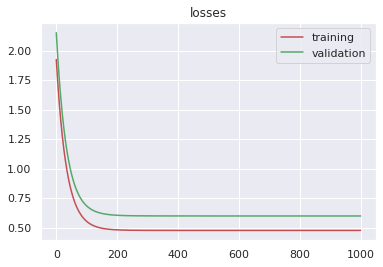

In [ ]:
plot_loss(history, title='losses')

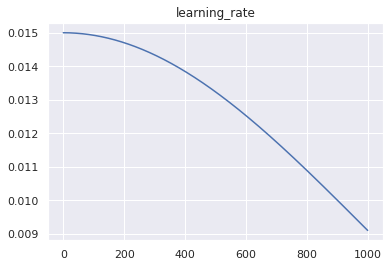

In [ ]:
plot_lr(lr=learning_rate, iterations=iterations, decay=decay,)

#### Compare to baseline models


In [ ]:
models_comparison = pd.DataFrame([["Sklearn Linear Regression", MSE(X_train_copy, y_train, reg1.coef_)*2, MSE(X_test_copy, y_test, reg1.coef_)*2],
                                  ["Sklearn SGDRegressor"     , MSE(X_train_copy, y_train, reg2.coef_)*2, MSE(X_test_copy, y_test, reg2.coef_)*2],
                                  ["Our Gradient Descent"     , MSE(X_train_copy, y_train, theta)*2, MSE(X_test_copy, y_test, theta)*2],
                                  ], columns=["Model Name", "MSE Train", "MSE Test"])

models_comparison.sort_values(by=["MSE Test"])

# src: https://stackoverflow.com/questions/17232013/how-to-set-the-pandas-dataframe-data-left-right-alignment
models_comparison.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Model Name,MSE Train,MSE Test
0,Sklearn Linear Regression,0.476305,4972819641304340754333696.000000
1,Sklearn SGDRegressor,0.475645,0.593514
2,Our Gradient Descent,0.475325,0.597755


## Part 5 - Incrementally add train data
Note : run previous cells before running this cell

In [ ]:
loss_by_data_amount = [] # will contain tuples (train_loss, test_loss)

# limited_data_count = 10 ---> 1000 by 10 increments
for limited_data_count in range(10, 1000 + 1, 10):

  print(f"Training the model with {limited_data_count} training data")
  # train model using GD with 'limited_data_count' training data
  train_loss, test_loss = train_model_using_GD(X_train,
                                               y_train,
                                               X_test,
                                               y_test,
                                               iterations=500,
                                               learning_rate=0.015,
                                               decay=0.000001,
                                               N = limited_data_count)
  
  loss_by_data_amount.append((train_loss, test_loss))
  print()

Training the model with 10 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.181 | validation_loss : 2.6443

Training the model with 20 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.356 | validation_loss : 1.019

Training the model with 30 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.3632 | validation_loss : 0.7187

Training the model with 40 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.3958 | validation_loss : 0.7088

Training the model with 50 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.3447 | validation_loss : 0.6856

Training the model with 60 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.3754 | validation_loss : 0.6634

Training the model with 70 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4075 | validation_loss : 0.689

Training the model with 80 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.3852 | validation_loss : 0.6736

Training the model with 90 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.3918 | validation_loss : 0.6553

Training the model with 100 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4199 | validation_loss : 0.6509

Training the model with 110 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4555 | validation_loss : 0.6389

Training the model with 120 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4675 | validation_loss : 0.6325

Training the model with 130 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4551 | validation_loss : 0.6326

Training the model with 140 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4539 | validation_loss : 0.6221

Training the model with 150 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5008 | validation_loss : 0.6273

Training the model with 160 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5137 | validation_loss : 0.6295

Training the model with 170 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5014 | validation_loss : 0.6243

Training the model with 180 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4832 | validation_loss : 0.6209

Training the model with 190 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4624 | validation_loss : 0.623

Training the model with 200 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4428 | validation_loss : 0.6208

Training the model with 210 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4367 | validation_loss : 0.6159

Training the model with 220 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4572 | validation_loss : 0.6066

Training the model with 230 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4518 | validation_loss : 0.6062

Training the model with 240 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.444 | validation_loss : 0.6112

Training the model with 250 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4759 | validation_loss : 0.608

Training the model with 260 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4762 | validation_loss : 0.6062

Training the model with 270 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4796 | validation_loss : 0.609

Training the model with 280 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4664 | validation_loss : 0.6072

Training the model with 290 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4725 | validation_loss : 0.6108

Training the model with 300 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4808 | validation_loss : 0.6118

Training the model with 310 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4886 | validation_loss : 0.6092

Training the model with 320 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4806 | validation_loss : 0.6062

Training the model with 330 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4884 | validation_loss : 0.6037

Training the model with 340 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.485 | validation_loss : 0.6035

Training the model with 350 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4838 | validation_loss : 0.5995

Training the model with 360 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4876 | validation_loss : 0.5948

Training the model with 370 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4793 | validation_loss : 0.5969

Training the model with 380 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4814 | validation_loss : 0.5983

Training the model with 390 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4913 | validation_loss : 0.6014

Training the model with 400 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.487 | validation_loss : 0.6005

Training the model with 410 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4781 | validation_loss : 0.6002

Training the model with 420 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4787 | validation_loss : 0.6062

Training the model with 430 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4794 | validation_loss : 0.6019

Training the model with 440 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4807 | validation_loss : 0.6

Training the model with 450 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4822 | validation_loss : 0.5996

Training the model with 460 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4752 | validation_loss : 0.6001

Training the model with 470 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4822 | validation_loss : 0.5999

Training the model with 480 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4834 | validation_loss : 0.5991

Training the model with 490 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4828 | validation_loss : 0.5962

Training the model with 500 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4816 | validation_loss : 0.5974

Training the model with 510 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4771 | validation_loss : 0.5959

Training the model with 520 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4847 | validation_loss : 0.5964

Training the model with 530 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4974 | validation_loss : 0.5933

Training the model with 540 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5003 | validation_loss : 0.5927

Training the model with 550 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5109 | validation_loss : 0.5901

Training the model with 560 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5066 | validation_loss : 0.5886

Training the model with 570 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5014 | validation_loss : 0.5888

Training the model with 580 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5143 | validation_loss : 0.5863

Training the model with 590 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.516 | validation_loss : 0.584

Training the model with 600 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.519 | validation_loss : 0.5854

Training the model with 610 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5169 | validation_loss : 0.587

Training the model with 620 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5136 | validation_loss : 0.5872

Training the model with 630 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.509 | validation_loss : 0.5858

Training the model with 640 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5092 | validation_loss : 0.5868

Training the model with 650 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5039 | validation_loss : 0.587

Training the model with 660 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5037 | validation_loss : 0.5877

Training the model with 670 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5047 | validation_loss : 0.5874

Training the model with 680 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5003 | validation_loss : 0.5873

Training the model with 690 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.503 | validation_loss : 0.5844

Training the model with 700 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.5029 | validation_loss : 0.5853

Training the model with 710 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4984 | validation_loss : 0.5857

Training the model with 720 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4926 | validation_loss : 0.5862

Training the model with 730 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4907 | validation_loss : 0.5879

Training the model with 740 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.491 | validation_loss : 0.5866

Training the model with 750 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4878 | validation_loss : 0.587

Training the model with 760 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4879 | validation_loss : 0.588

Training the model with 770 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.484 | validation_loss : 0.5893

Training the model with 780 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4823 | validation_loss : 0.5906

Training the model with 790 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4804 | validation_loss : 0.5924

Training the model with 800 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4806 | validation_loss : 0.5951

Training the model with 810 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.481 | validation_loss : 0.5942

Training the model with 820 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4868 | validation_loss : 0.5928

Training the model with 830 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4841 | validation_loss : 0.5931

Training the model with 840 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4788 | validation_loss : 0.5936

Training the model with 850 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4771 | validation_loss : 0.594

Training the model with 860 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4797 | validation_loss : 0.5932

Training the model with 870 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4762 | validation_loss : 0.5931

Training the model with 880 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4757 | validation_loss : 0.5926

Training the model with 890 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4741 | validation_loss : 0.5942

Training the model with 900 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4737 | validation_loss : 0.595

Training the model with 910 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4715 | validation_loss : 0.5958

Training the model with 920 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4687 | validation_loss : 0.5959

Training the model with 930 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4669 | validation_loss : 0.596

Training the model with 940 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4703 | validation_loss : 0.5965

Training the model with 950 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4684 | validation_loss : 0.5971

Training the model with 960 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.473 | validation_loss : 0.5961

Training the model with 970 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4721 | validation_loss : 0.5964

Training the model with 980 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4698 | validation_loss : 0.5975

Training the model with 990 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4782 | validation_loss : 0.5976

Training the model with 1000 training data


  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4753 | validation_loss : 0.5978



In [ ]:
x = list(range(10, 1000 + 1, 10))
y1 = np.array(loss_by_data_amount)[:,0] # train loss
y2 = np.array(loss_by_data_amount)[:,1] # valid loss

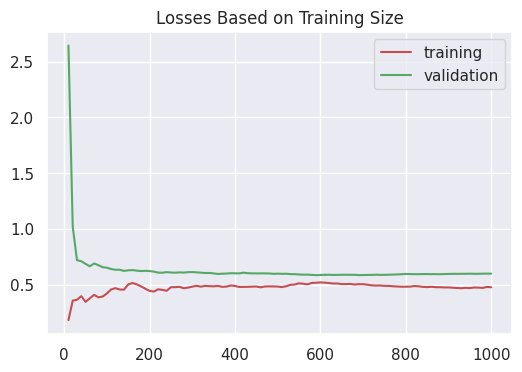

In [ ]:
plot_two_curves(x,
                y1,
                x,
                y2,
                title='Losses Based on Training Size',
                dpi=100)

## Part 6 - Stochastic Gradient Descent

In [ ]:
# Testing the splitting mechanism
xx = list(range(1,105))
_batch_size = 20
_batch_count = len(xx)//_batch_size if len(xx)%_batch_size==0 else len(xx)//_batch_size+1
for _batch_id in range(_batch_count):
        # Select current batch from the whole data
        if _batch_id*_batch_size+_batch_size<len(xx):
          print(xx[_batch_id*_batch_size:_batch_id*_batch_size+_batch_size])
        else:
          # The last batch (from 'batch_id*batch_size' to the end )
          print(xx[_batch_id*_batch_size:])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[101, 102, 103, 104]


In [ ]:
def unison_shuffle(a, b):
  # src  : https://stackoverflow.com/a/4602224
  # src2 : https://stackoverflow.com/a/44755462
  # shuffles a list of indexes
  # then re-indexes dataframes using 
  # the shuffled indexes
  idx = np.random.permutation(len(a))
  return a.reindex(idx), b.reindex(idx)



#### Mini-batch SGD Function



In [ ]:
# Mini-batch Stochastic Gradient Descent
# instead of passing the whole data and 
# calculating a gradient based on that, 
# we calculate a gradient based on a randomly
# chosen batch of data and repeat that for every batch.
# help from : https://realpython.com/gradient-descent-algorithm-python/#stochastic-gradient-descent-algorithms
def stochasticGradientDescent(X, y, theta, lr, iteration, X_valid, y_valid, loss_fn = MSE, loss_fn_prim = MSE_prim, decay=0.0, batch_size=50):

  
  # jointly shuffle X,y
  X_shuffled, y_shuffled = unison_shuffle(X, y) # 'S' in mini-batch SGD
  # batch count
  batch_count = len(X)//batch_size if len(X)%batch_size==0 else len(X)//batch_size+1

  # Training loss per iteration history
  train_loss_history = []
  # Validation loss per iteration history
  validation_loss_history = []
  # weights progression towards the optimal value
  theta_history = []
  
  batch_X = None
  batch_y = None
  # Progress bar
  with tqdm(total=iteration) as pbar:
    for itera in range(iteration):
      for batch_id in range(batch_count): # 'mini-batch' in mini-batch SGD
        
        # Select current batch from the whole data
        if batch_id*batch_size+batch_size<len(X):
          batch_X = X_shuffled.iloc[batch_id*batch_size:batch_id*batch_size+batch_size, :]
          batch_y = y_shuffled.iloc[batch_id*batch_size:batch_id*batch_size+batch_size]
        else:
          # The last batch (from 'batch_id*batch_size' to the end )
          batch_X = X_shuffled.iloc[batch_id*batch_size:, :]
          batch_y = y_shuffled.iloc[batch_id*batch_size:]

        
        # Learning rate decay
        lr = lr * 1/(1 + decay * itera)

        # for every feature
        for i in range(0, len(batch_X.columns)):
          # Partial derivative of loss function with respect to Xi
          gradient = loss_fn_prim(batch_X, batch_y, i, theta)
          # Actual "Gradient Descent" !
          theta[i] -= lr * gradient
      
      # Calculating the loss after each iteration
      # of updating the weights using Gradient Descent
      loss = loss_fn(X, y, theta)*2
      validation_loss = loss_fn(X_valid, y_valid, theta)*2

      # Save the history of loss and weights
      validation_loss_history.append(validation_loss)
      train_loss_history.append(loss)
      theta_history.append(theta.copy())

      # Update progress bar
      pbar.update(1)

  history = {"training_loss":train_loss_history,
             "validation_loss":validation_loss_history,
             "weights":theta_history}
             
  # returns loss history, latest loss, weights
  print(f"training_loss : {round(train_loss_history[-1],4)} | validation_loss : {round(validation_loss_history[-1],4)}")
  return history, loss, theta

#### Training using SGD

In [ ]:
# Mini-batch Stochastic Gradient Descent

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Initialize the weights with random values
theta = np.random.rand(len(X_train.columns),)
# Initialize the weights with zeros
theta = np.array([0.0]*len(X_train_copy.columns))

# Hyper-Parameters
iterations = 500
learning_rate = 0.015
decay = 0.000001
batch_size = 20

# Start the training
history, loss, theta = stochasticGradientDescent(X_train_copy,
                                                 y_train,
                                                 theta,
                                                 learning_rate,
                                                 iterations,
                                                 X_valid = X_test_copy,
                                                 y_valid = y_test,
                                                 loss_fn=MSE,
                                                 loss_fn_prim=MSE_prim,
                                                 batch_size=250,
                                                 decay = decay, 
                                                 )

# Calculate Our Models MSE
print("- Our Model")
print("\nMSE on train :", MSE(X_train_copy, y_train, theta)*2)
print("MSE on test :", MSE(X_test_copy, y_test, theta)*2)

  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.4753 | validation_loss : 0.5977
- Our Model

MSE on train : 0.4753260203861056
MSE on test : 0.5976805785473772


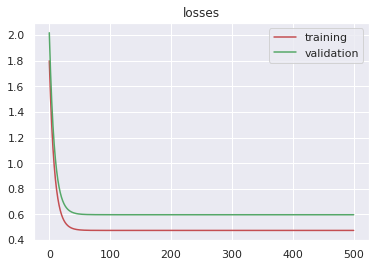

In [ ]:
plot_loss(history, title='losses')

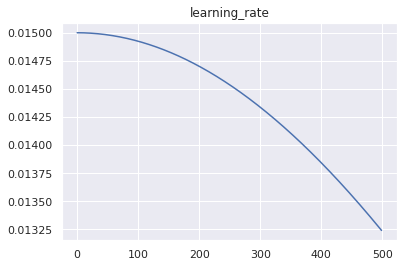

In [ ]:
plot_lr(lr=learning_rate, iterations=iterations, decay=decay,)